In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display

import IPython.display as ipd

In [6]:
audio_files = glob('/kaggle/input/ravdess-emotional-speech-audio/*/*.wav')
audio_files[:5]

['/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-08-01-01-01-02.wav',
 '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-01-02.wav',
 '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-02-01-02-02.wav',
 '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-01-01-02-02.wav',
 '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-02-01-02.wav']

In [7]:
# Play audio file
ipd.Audio(audio_files[0])

In [12]:
# y = raw data of the audio file
# sr = sample rate
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape y: (77988,)
sr: 22050


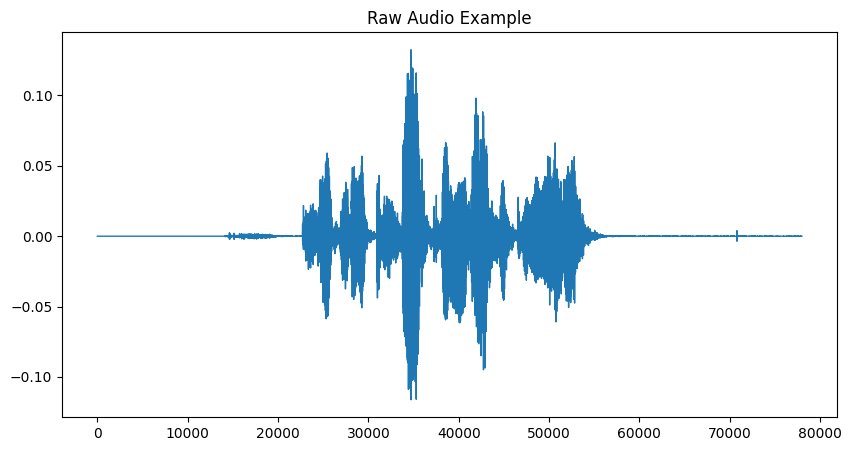

In [17]:
pd.Series(y).plot(figsize=(10, 5), lw=1, title='Raw Audio Example')
plt.show()

In [26]:
y_trimmed, _ = librosa.effects.trim(y, top_db=20)

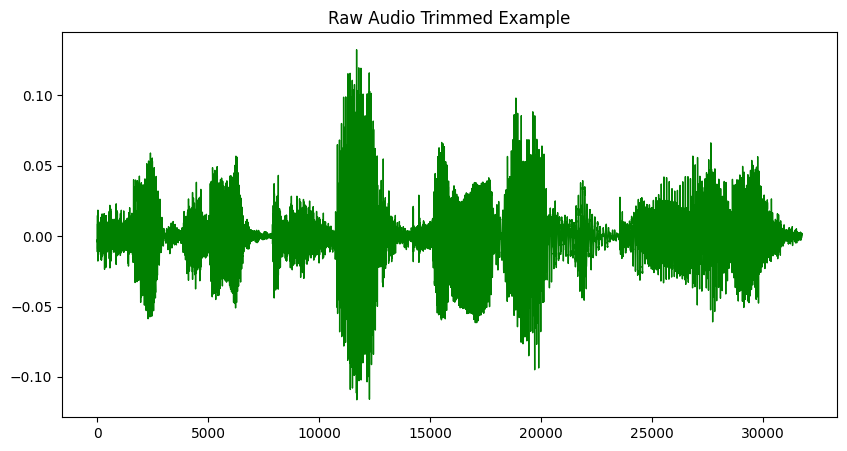

In [30]:
pd.Series(y_trimmed).plot(figsize=(10, 5), lw=1, title='Raw Audio Trimmed Example', color='green')
plt.show()

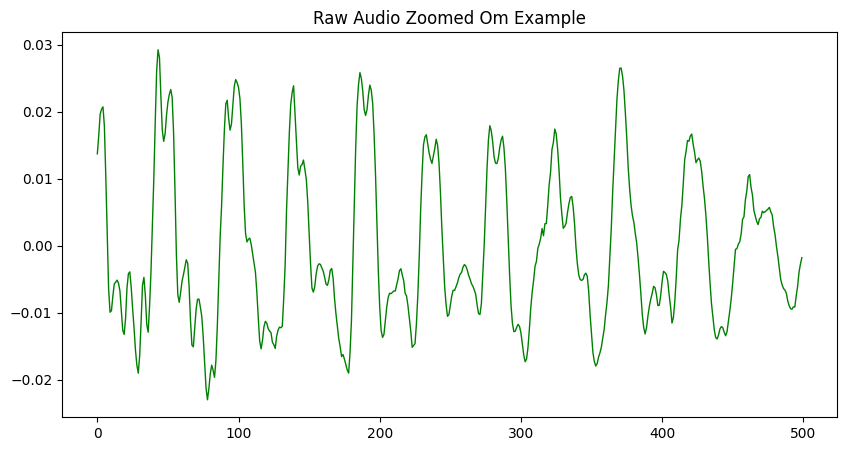

In [35]:
pd.Series(y_trimmed[30000:30500]).plot(figsize=(10, 5), lw=1, title='Raw Audio Zoomed Om Example', color='green')
plt.show()

In [36]:
#Spectogram
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 153)

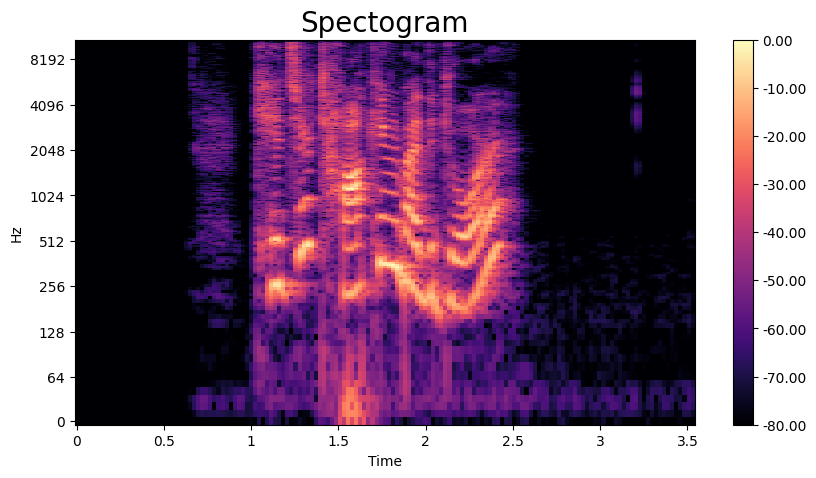

In [40]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectogram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [49]:
#Mel Spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=256,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

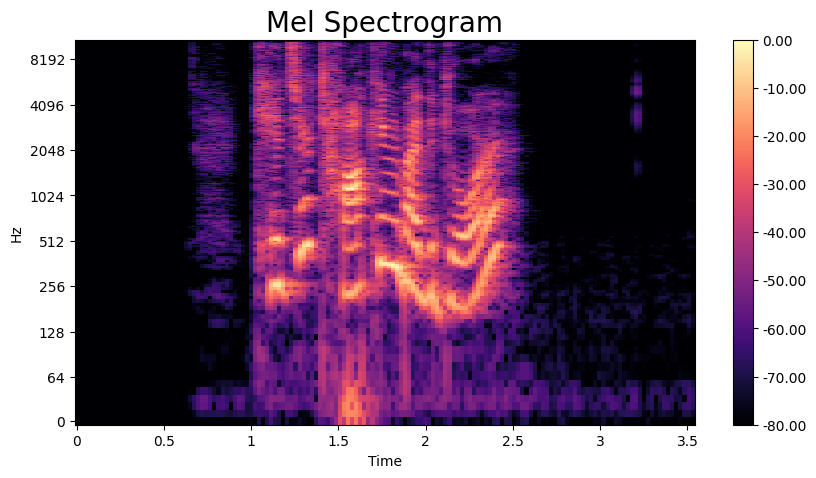

In [50]:
# Plot the mel spectrogram
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Mel Spectrogram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()